#### Compare datasets of irrigated crop yield and Kayrokum lake volume and Geoid height
#### Build regression models using train and test datasets
#### Predict internal market price for 1 kg of rice

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_vol = pd.read_csv('Kayrokum_volume.csv')

In [4]:
df_vol['Start time'] = pd.to_datetime(df_vol['Start time'])
df_vol['Month'] = df_vol['Start time'].apply(lambda x: x.month)

In [5]:
df_vol.head()

,Start time,Value,Unit,Month
0,2008-07-21 03:24:00,1.514,10^6 m^3,7
1,2008-07-31 01:23:00,1.346,10^6 m^3,7
2,2008-08-19 21:20:00,1.013,10^6 m^3,8
3,2008-08-09 17:17:00,0.898,10^6 m^3,8
4,2008-09-28 13:14:00,0.832,10^6 m^3,9


In [6]:
months = np.sort(df_vol['Month'].unique())

In [7]:
print(months)

[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [8]:
df_vol_group_month = df_vol.groupby('Month')

In [9]:
df_vol_group_month['Value'].min()

Month
1     1.420
2     1.661
3     1.714
4     1.122
5     1.088
6     0.898
7     0.789
8     0.868
9     0.732
10    0.749
11    0.947
12    1.161
Name: Value, dtype: float64

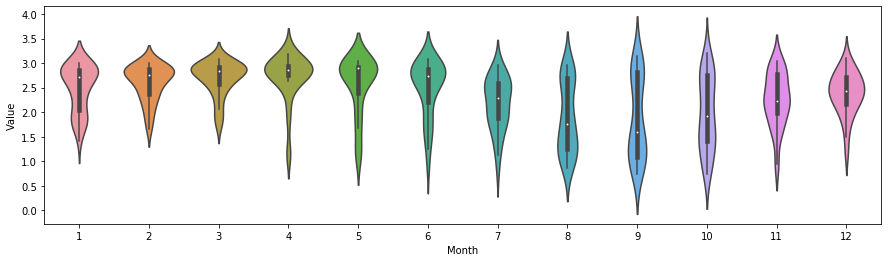

In [10]:
#Violin plot of lake volume distribution grouped by month
plt.figure(figsize=(15,4))
sns.violinplot(x='Month', y='Value', data=df_vol)

In [11]:
df_vol['Year']=df_vol['Start time'].apply(lambda x: x.year)

In [12]:
df_vol.head()

,Start time,Value,Unit,Month,Year
0,2008-07-21 03:24:00,1.514,10^6 m^3,7,2008
1,2008-07-31 01:23:00,1.346,10^6 m^3,7,2008
2,2008-08-19 21:20:00,1.013,10^6 m^3,8,2008
3,2008-08-09 17:17:00,0.898,10^6 m^3,8,2008
4,2008-09-28 13:14:00,0.832,10^6 m^3,9,2008


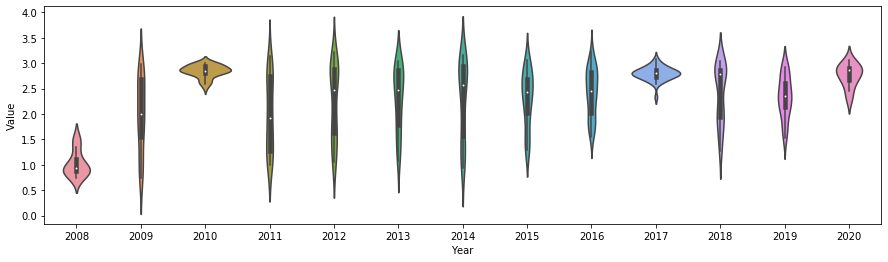

In [13]:
# Violin plot of lake volume per each year
plt.figure(figsize=(15,4))
sns.violinplot(x='Year', y='Value', data= df_vol)

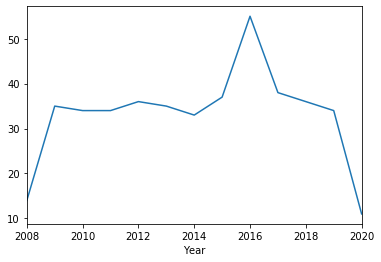

In [14]:
# Number of recorded observations per year
df_vol.groupby('Year')['Value'].count().plot()

### Adding Kyrokum lake Geoid height

In [15]:
df_geoh = pd.read_csv('Kayrokum_max_geoid_height.csv')

In [16]:
type(df_geoh['Start time'][0])

str

In [17]:
# Getting month and year from the measurement timestamp
df_geoh['Start time'] = pd.to_datetime(df_geoh['Start time'])
df_geoh['Month'] = df_geoh['Start time'].apply(lambda x: x.month)
df_geoh['Year'] = df_geoh['Start time'].apply(lambda x: x.year)

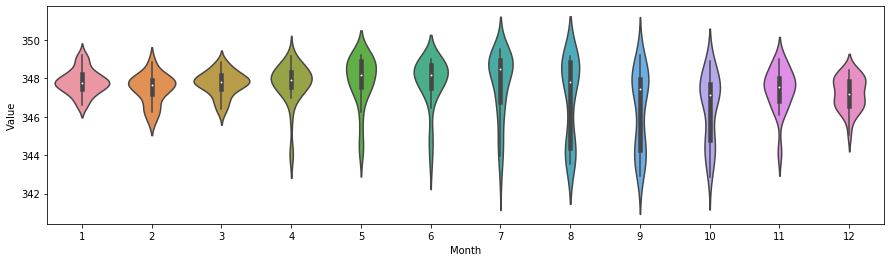

In [18]:
#Violin plot of lake geoid heught distribution grouped by month
plt.figure(figsize=(15,4))
sns.violinplot(x='Month', y='Value', data=df_geoh)

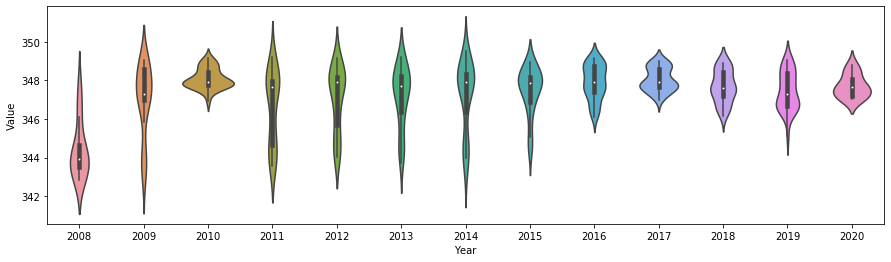

In [19]:
#Violin plot of lake geoid heught distribution grouped by year
plt.figure(figsize=(15,4))
sns.violinplot(x='Year', y='Value', data=df_geoh)

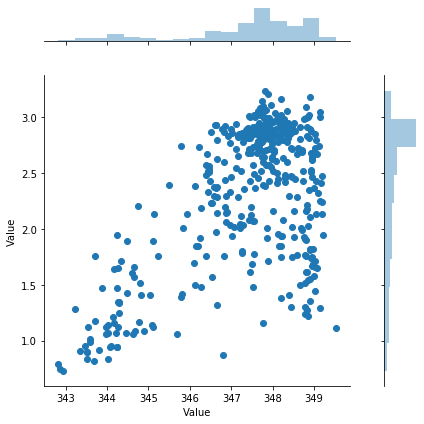

In [20]:
# Scatter plot with distribution height vs volume
sns.jointplot(x=df_geoh['Value'][:-4], y=df_vol['Value'], kind='scatter', space=1)

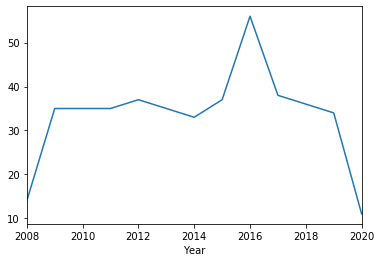

In [21]:
# Number of recorded observations of height per year
df_geoh.groupby('Year')['Value'].count().plot()

In [22]:
# How to find missing observations from the volume dataset?

C:\Users\kachk\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\kachk\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\kachk\Anaconda3\lib\site-packages\seaborn\distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\kachk\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\kachk\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


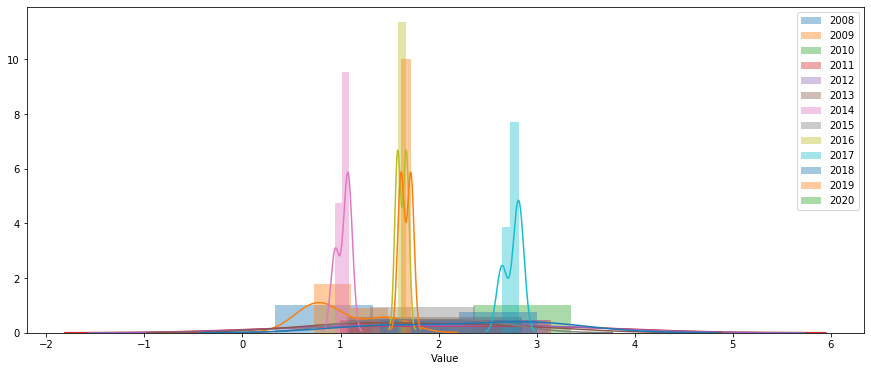

In [23]:
# Ploting lake volume for September per year
plt.figure(figsize=(15,6))
report_month = 9

for i in df_vol['Year'].unique():
    sns.distplot(df_vol[(df_vol['Month']==report_month) & (df_vol['Year']==i)]['Value'])

plt.legend(df_vol['Year'].unique())

In [24]:
df_vol.groupby(['Month', 'Year']).count()

Start time  Value  Unit
Month Year                         
1     2009           3      3     3
      2010           3      3     3
      2011           2      2     2
      2012           3      3     3
      2013           3      3     3
...                ...    ...   ...
12    2016           2      2     2
      2017           3      3     3
      2018           2      2     2
      2019           3      3     3
      2020           1      1     1

[144 rows x 3 columns]

In [25]:
df_geoh.groupby('Month').count()

,Start time,Value,Type,Unit,Year
Month,,,,,
1,37,37,37,37,37
2,31,31,31,31,31
3,36,36,36,36,36
4,37,37,37,37,37
5,39,39,39,39,39
6,38,38,38,38,38
7,40,40,40,40,40
8,39,39,39,39,39
9,36,36,36,36,36


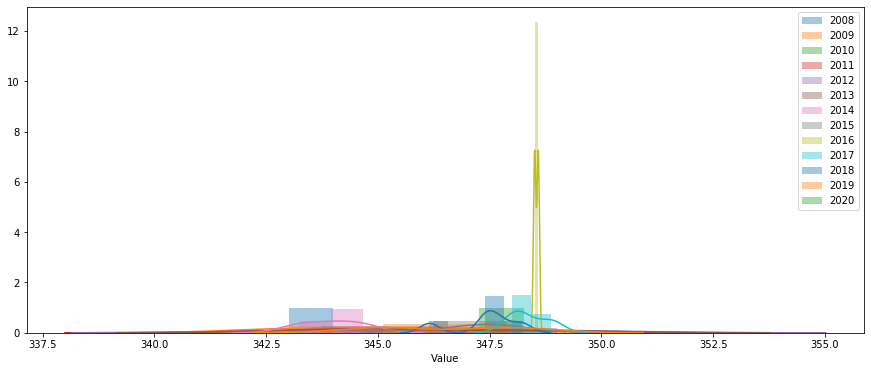

In [26]:
# Ploting lake geoid height for September per year
plt.figure(figsize=(15,6))
report_month = 9

for i in df_geoh['Year'].unique():
    sns.distplot(df_geoh[(df_geoh['Month']==report_month) & (df_geoh['Year']==i)]['Value'])

plt.legend(df_geoh['Year'].unique())

In [27]:
# Modeling volume as cube of height in m^3
df_geoh['Height^3']=df_geoh['Value'].apply(lambda x: x**3/1000000)

In [28]:
df_geoh.head()

,Start time,Value,Type,Unit,Month,Year,Height^3
0,2008-07-21 03:24:00,344.790,Geoid height,meter,7,2008,40.988685
1,2008-07-31 01:23:00,344.270,Geoid height,meter,7,2008,40.803511
2,2008-08-19 21:20:00,343.582,Geoid height,meter,8,2008,40.559371
3,2008-08-09 17:17:00,343.525,Geoid height,meter,8,2008,40.539188
4,2008-09-28 13:14:00,343.507,Geoid height,meter,9,2008,40.532816


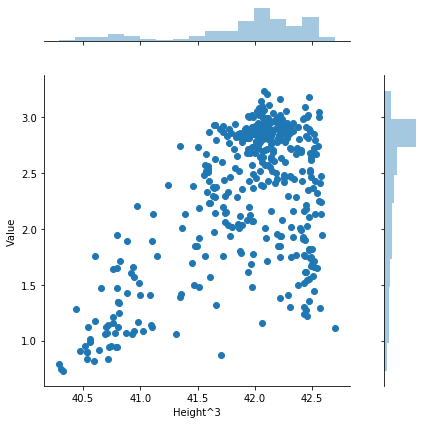

In [29]:
# Scatter plot with distribution height^3 vs volume
sns.jointplot(x=df_geoh['Height^3'][:-4], y=df_vol['Value'], kind='scatter', space=1)

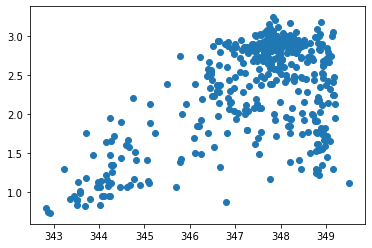

In [30]:
plt.scatter(x=df_geoh['Value'][:-4], y=df_vol['Value'])

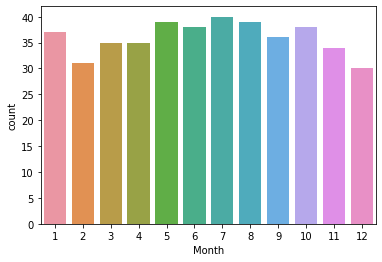

In [31]:
# Number of observations per month
sns.countplot(x='Month', data=df_vol)

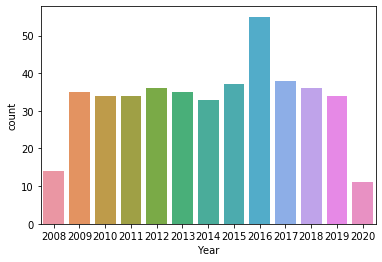

In [32]:
# Number of observations per year
sns.countplot(x='Year', data=df_vol)

### Domain knowledge comment
Assuming that lowest possible volume is the minimum water level in the lake.
There are three possible conditions:
1. Volume doesn't change between two measurements. This means that flow rate in equals flow rate out. This will be considered as zero usage for irrigation. Water just flows through the lake and leaves into Syr Darya.
2. Volume increases from one measurement to another. This means that water is accumulated in the lake. It can be realised either by closing the damb or by increasing the flow in the lake, e.g. during snow melting in the mountains.
3. Volume drops between two measurements. This is perceived as water used for irrigation. Cumulative sum can be named as yearly irrigation water usage. This value can be assessed for its correlation with yearly crop yield.

For consistency one can assume that outlet flow rate is always the same and water volume increase or decrease is acheved by increasing inlet flow rate and using water for irrigation, respectively

In [33]:
df_cropy = pd.read_csv('Sogd_Crop_Pattern\Sogd_Province_cropYield_2018.csv')

In [40]:
df_cropy.head(12)

,Irrigation crop yields in Sogd Province 2018,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Site (district),"Irrigation area, gross",Net irrigated area,Industrial crops,NaN,Grain,NaN,Vegetables and cucurbits,Fodder crops,Perennial crops,NaN,Homestead plots,Other,Rice
1,NaN,NaN,NaN,Total*,Cotton,Total**,Wheat,NaN,NaN,Orchards,Grapes,NaN,NaN,NaN
2,NaN,ha,ha,t/ha,t/ha,t/ha,t/ha,t/ha,t/ha,t/ha,t/ha,t/ha,t/ha,t/ha
3,Isfara,NaN,6968.4,NaN,3.46,NaN,6.43,NaN,NaN,NaN,NaN,NaN,NaN,2.53
4,Jabbor Rasulov,NaN,8360.9,NaN,3.22,NaN,4.19,NaN,NaN,NaN,NaN,NaN,NaN,4.61
5,Asht,NaN,10566.7,NaN,2.19,NaN,7.14,NaN,NaN,NaN,NaN,NaN,NaN,2.78
6,Konibodom,NaN,15327.7,NaN,2.06,NaN,6.57,NaN,NaN,NaN,NaN,NaN,NaN,2.62
7,Zafarobod,NaN,17657.4,NaN,2.14,NaN,5.41,NaN,NaN,NaN,NaN,NaN,NaN,2.25
8,Spitamen,NaN,11237.5,NaN,2.62,NaN,4.82,NaN,NaN,NaN,NaN,NaN,NaN,4.76
9,B.Ghafurov,NaN,24025.1,NaN,2.13,NaN,4.84,NaN,NaN,NaN,NaN,NaN,NaN,3.82


In [37]:
# Crop yield report file title
df_cropy.columns.values[0]

'Irrigation crop yields in Sogd Province 2018'

In [50]:
# Extracting the year of crop yield report
df_cropy.columns.values[0][26:30]

'Sogd'

In [42]:
# Adding column with year with corresponding value
df_cropy['Report Year'] = df_cropy.columns.values[0][40:44]

In [55]:
# Adding column Province with value
df_cropy['Province'] = df_cropy.columns.values[0][26:30]

In [64]:
df_cropy.head()

,Irrigation crop yields in Sogd Province 2018,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Report Year,Province
0,Site (district),"Irrigation area, gross",Net irrigated area,Industrial crops,NaN,Grain,NaN,Vegetables and cucurbits,Fodder crops,Perennial crops,NaN,Homestead plots,Other,Rice,2018,Sogd
1,NaN,NaN,NaN,Total*,Cotton,Total**,Wheat,NaN,NaN,Orchards,Grapes,NaN,NaN,NaN,2018,Sogd
2,NaN,ha,ha,t/ha,t/ha,t/ha,t/ha,t/ha,t/ha,t/ha,t/ha,t/ha,t/ha,t/ha,2018,Sogd
3,Isfara,NaN,6968.4,NaN,3.46,NaN,6.43,NaN,NaN,NaN,NaN,NaN,NaN,2.53,2018,Sogd
4,Jabbor Rasulov,NaN,8360.9,NaN,3.22,NaN,4.19,NaN,NaN,NaN,NaN,NaN,NaN,4.61,2018,Sogd


In [93]:
#Get columns where most of the data are NaN values
nan_col = []
for i in range(len(df_cropy.columns)):
    if df_cropy.iloc[:,[i]].isnull().sum()[0]>3:
        nan_col.append(i)
        

In [104]:
#Dropping colunns where most data are NaN values
df_cropy.drop(df_cropy.iloc[:,nan_col].columns.values, axis=1, inplace=True)

In [105]:
df_cropy.head()

,Irrigation crop yields in Sogd Province 2018,Unnamed: 2,Unnamed: 4,Unnamed: 6,Unnamed: 13,Report Year,Province
0,Site (district),Net irrigated area,NaN,NaN,Rice,2018,Sogd
1,NaN,NaN,Cotton,Wheat,NaN,2018,Sogd
2,NaN,ha,t/ha,t/ha,t/ha,2018,Sogd
3,Isfara,6968.4,3.46,6.43,2.53,2018,Sogd
4,Jabbor Rasulov,8360.9,3.22,4.19,4.61,2018,Sogd


In [157]:
#Renaming columns
new_colnames = [df_cropy.iloc[0,0], df_cropy.iloc[0,1],df_cropy.iloc[1,2],df_cropy.iloc[1,3], df_cropy.iloc[0,4], 'Report Year', 'Province']

In [158]:
#Changing column names
df_cropy.columns=new_colnames

7

In [164]:
# Add units columns
df_cropy['Area Units']='ha'
df_cropy['Yield Units']='t/ha'

In [171]:
#Drop useless rows
df_cropy.drop([0], axis=0, inplace=True)

In [172]:
df_cropy

,Site (district),Net irrigated area,Cotton,Wheat,Rice,Report Year,Province,Area Units,Yield Units
3,Isfara,6968.4,3.46,6.43,2.53,2018,Sogd,ha,t/ha
4,Jabbor Rasulov,8360.9,3.22,4.19,4.61,2018,Sogd,ha,t/ha
5,Asht,10566.7,2.19,7.14,2.78,2018,Sogd,ha,t/ha
6,Konibodom,15327.7,2.06,6.57,2.62,2018,Sogd,ha,t/ha
7,Zafarobod,17657.4,2.14,5.41,2.25,2018,Sogd,ha,t/ha
8,Spitamen,11237.5,2.62,4.82,4.76,2018,Sogd,ha,t/ha
9,B.Ghafurov,24025.1,2.13,4.84,3.82,2018,Sogd,ha,t/ha
10,Mastchoh,21248.5,1.97,2.09,3.85,2018,Sogd,ha,t/ha
11,Istaravshan,2907.5,1.23,0,0,2018,Sogd,ha,t/ha
12,Ghonchi,161.7,0,0,0,2018,Sogd,ha,t/ha


In [226]:
#Opening Ecel file with crop yield results
df_cropy = pd.read_excel(open('Sogd_Crop_Pattern\Sogd_Province_cropYield_2018.xlsx','rb'))
# Adding column with year with corresponding value
df_cropy['Report Year'] = df_cropy.columns.values[0][40:44]
# Adding column Province with value
df_cropy['Province'] = df_cropy.columns.values[0][26:30]

#Get columns where most of the data are NaN values
nan_col = []
for i in range(len(df_cropy.columns)):
    if df_cropy.iloc[:,[i]].isnull().sum()[0]>3:
        nan_col.append(i)
        
#Dropping colunns where most data are NaN values
df_cropy.drop(df_cropy.iloc[:,nan_col].columns.values, axis=1, inplace=True)

#Renaming columns
new_colnames = [df_cropy.iloc[0,0], df_cropy.iloc[0,1],df_cropy.iloc[1,2],df_cropy.iloc[1,3], df_cropy.iloc[0,4], 'Report Year', 'Province']

#Changing column names
df_cropy.columns=new_colnames

# Add units columns
df_cropy['Area Units']='ha'
df_cropy['Yield Units']='t/ha'

#Drop useless rows
df_cropy.drop([0,1,2,14,15], axis=0, inplace=True)

In [227]:
df_cropy

,Site (district),Net irrigated area,Cotton,Wheat,Rice,Report Year,Province,Area Units,Yield Units
3,Isfara,6968.4,3.46,6.43,2.53,2018,Sogd,ha,t/ha
4,Jabbor Rasulov,8360.9,3.22,4.19,4.61,2018,Sogd,ha,t/ha
5,Asht,10566.7,2.19,7.14,2.78,2018,Sogd,ha,t/ha
6,Konibodom,15327.7,2.06,6.57,2.62,2018,Sogd,ha,t/ha
7,Zafarobod,17657.4,2.14,5.41,2.25,2018,Sogd,ha,t/ha
8,Spitamen,11237.5,2.62,4.82,4.76,2018,Sogd,ha,t/ha
9,B.Ghafurov,24025.1,2.13,4.84,3.82,2018,Sogd,ha,t/ha
10,Mastchoh,21248.5,1.97,2.09,3.85,2018,Sogd,ha,t/ha
11,Istaravshan,2907.5,1.23,0,0,2018,Sogd,ha,t/ha
12,Ghonchi,161.7,0,0,0,2018,Sogd,ha,t/ha


In [228]:
df_cropy_total=df_cropy_total.append(df_cropy, ignore_index=True)

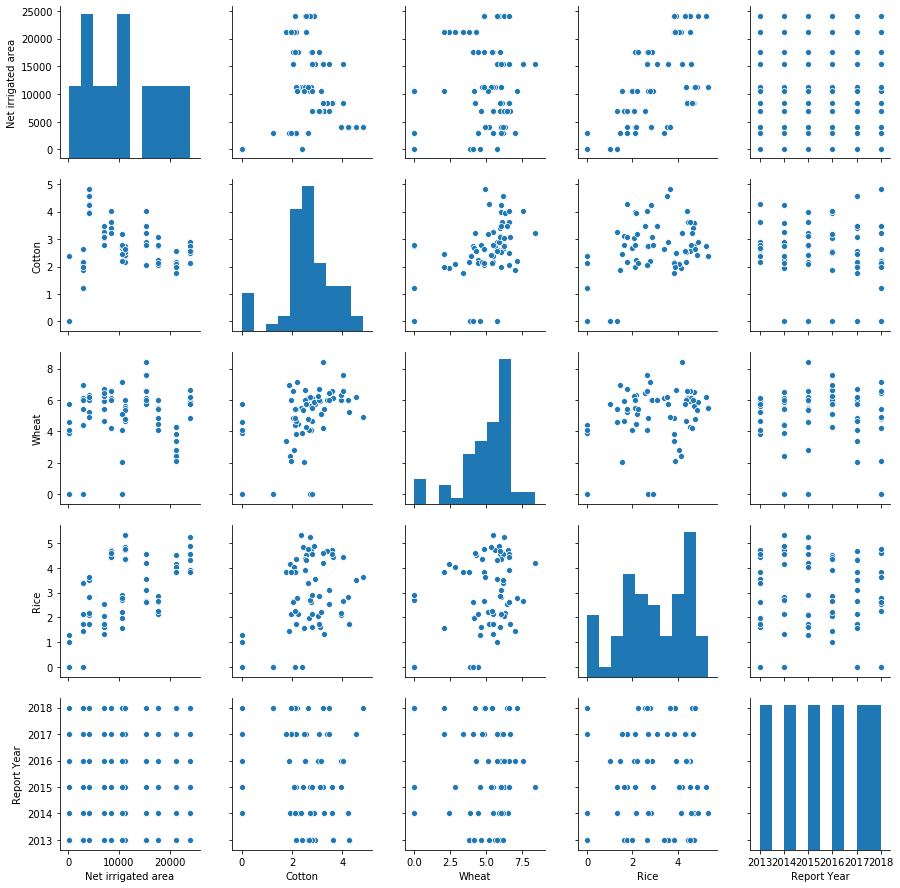

In [229]:
sns.pairplot(df_cropy_total)

In [243]:
df_cropy_total.groupby(['Site (district)']).mean()

DataError: No numeric types to aggregate

In [240]:
# Export dataframe into csv file
# df_cropy_total.to_csv('Sogd_Crop_Pattern\Sogd_Province_cropYield_Total.csv', index=True, header=True)

In [245]:
df_cropy_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 9 columns):
Site (district)       66 non-null object
Net irrigated area    66 non-null object
Cotton                66 non-null object
Wheat                 66 non-null object
Rice                  66 non-null object
Report Year           66 non-null object
Province              66 non-null object
Area Units            66 non-null object
Yield Units           66 non-null object
dtypes: object(9)
memory usage: 4.8+ KB
